In [4]:
%matplotlib inline


#  XDAWN Denoising


XDAWN filters are trained from epochs, signal is projected in the sources
space and then projected back in the sensor space using only the first two
XDAWN components. The process is similar to an ICA, but is
supervised in order to maximize the signal to signal + noise ratio of the
evoked response.

<div class="alert alert-danger"><h4>Warning</h4><p>As this denoising method exploits the known events to
             maximize SNR of the contrast between conditions it can lead
             to overfitting. To avoid a statistical analysis problem you
             should split epochs used in fit with the ones used in
             apply method.</p></div>

References
----------
[1] Rivet, B., Souloumiac, A., Attina, V., & Gibert, G. (2009). xDAWN
algorithm to enhance evoked potentials: application to brain-computer
interface. Biomedical Engineering, IEEE Transactions on, 56(8), 2035-2043.

[2] Rivet, B., Cecotti, H., Souloumiac, A., Maby, E., & Mattout, J. (2011,
August). Theoretical analysis of xDAWN algorithm: application to an
efficient sensor selection in a P300 BCI. In Signal Processing Conference,
2011 19th European (pp. 1382-1386). IEEE.



In [5]:
# Authors: Alexandre Barachant <alexandre.barachant@gmail.com>
#
# License: BSD (3-clause)


from mne import (io, compute_raw_covariance, read_events, pick_types, Epochs)
from mne.datasets import sample
from mne.preprocessing import Xdawn
from mne.viz import plot_epochs_image

data_path = sample.data_path()

#data_path = '/Users/alex/mne_data/MNE-sample-data'

Set parameters and read data



In [6]:
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
tmin, tmax = -0.1, 0.3
event_id = dict(vis_r=4)

# Setup for reading the raw data
raw = io.read_raw_fif(raw_fname, preload=True)
#raw.filter(1, 20)  # replace baselining with high-pass
raw.filter(1, None)  # replace baselining with high-pass
events = read_events(event_fname)

raw.info['bads'] = ['MEG 2443']  # set bad channels
picks = pick_types(raw.info, meg=True, eeg=False, stim=False, eog=False,
                   exclude='bads')
# Epoching
epochs = Epochs(raw, events, event_id, tmin, tmax, proj=False,
                picks=picks, baseline=None, preload=True,
                verbose=False)

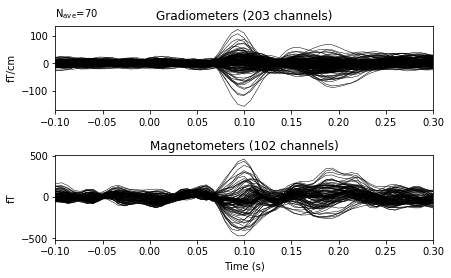

In [7]:
epochs.average().plot();

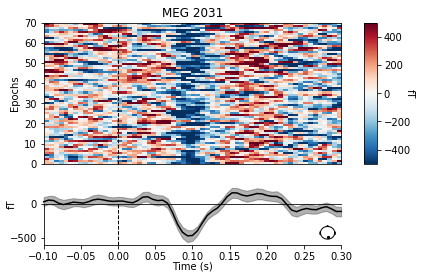

In [8]:
# Plot image epoch before xdawn
plot_epochs_image(epochs['vis_r'], picks=[230], vmin=-500, vmax=500);

In [9]:
# Estimates signal covariance
signal_cov = compute_raw_covariance(raw, picks=picks)

# Xdawn instance
xd = Xdawn(n_components=20, signal_cov=signal_cov)

# Fit xdawn
xd.fit(epochs)

# Denoise epochs
epochs_denoised = xd.apply(epochs)

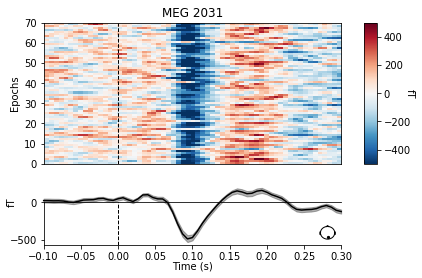

[<Figure size 432x288 with 4 Axes>]

In [10]:
# Plot image epoch after Xdawn
plot_epochs_image(epochs_denoised['vis_r'], picks=[230], vmin=-500, vmax=500)

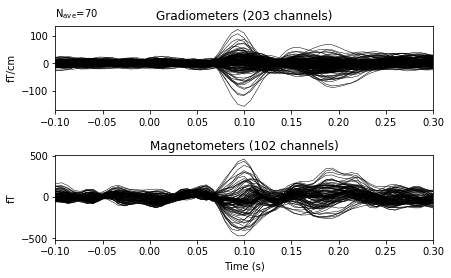

In [11]:
epochs['vis_r'].average().plot();

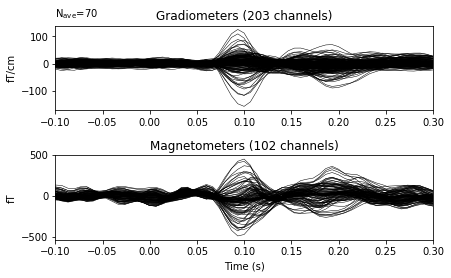

In [12]:
epochs_denoised['vis_r'].average().plot();

In [13]:
import mne

In [14]:
cov = mne.compute_covariance(epochs_denoised['vis_r'])

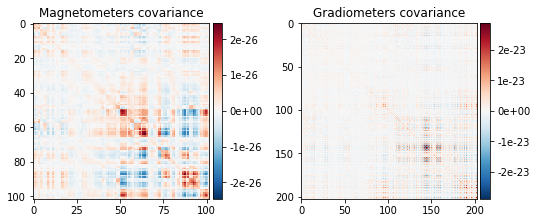

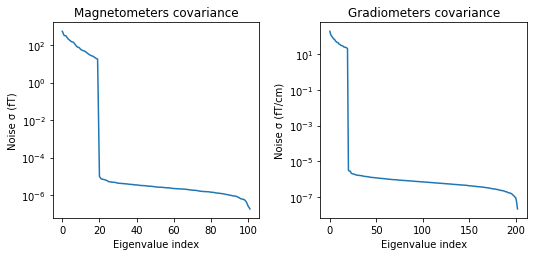

In [15]:
mne.viz.plot_cov(cov, epochs.info);